In [1]:
import pandas as pd
import numpy as np
from scipy.stats import beta
import random

In [2]:
products = pd.read_csv('DemoSimulationProducts.csv')
products['ProductId'] = products['ProductId'].astype(str)

In [3]:
products

,ProductId,ProductName,Price
0,1005,I Love Gorillas Distressed T-Shirt,15.00
1,1015,Standard Room,95.00
2,1016,Deluxe Room,195.00
3,1017,Suite Living Spaces,295.00
4,1032,Luxury Sheets,25.00
5,1033,Mini Bar,75.00
6,1034,Champagne,100.00
7,1039,Ballet: La Dame aux Camélias,119.99
8,1042,"Aerophile ""Parc du Petit Prince"" Single Ticket",21.00
9,1047,Single Bunk Bed,59.99


In [4]:
# leadDays = start date - current date 
# ID: cluster1, desc: SuddenTrip, leadDays< 7
# ID: cluster2, desc: PlannedTrip, leadDays > 21
# ID: cluster3, desc: BusinessRelatedTrip, 7<=leadDays<=21
# cluster1: [1016, 1047, 1042, 1050,  40000]
# cluster2: [1017, 1015, 1014, 1005, 1034, 1039]
# cluster3: [1016, 1033, 1051, 1052, 40006, 1000]

In [5]:
likelyItemsbyEachCluster = \
{
    'SuddenTrip' : ['1016', '1047', '1042', '1050',  '40000'],
    'PlannedTrip': ['1017', '1015', '1014', '1005', '1034', '1039'], 
    'BusinessRelatedTrip': ['1017', '1015', '1014', '1005', '1034', '1039']
    
}

In [6]:
def readPicklefile(path):
    with open(path, 'rb') as fp:
        data = pickle.load(fp)
    return data

In [7]:
def getCustomerCat(storeId, info):
    if info['LeadDays']<7:
        return 'SuddenTrip'
    
    elif info['LeadDays']>21:
        return 'PlannedTrip'
    
    else:
        return 'BusinessRelatedTrip'

In [8]:
clusters = list(likelyItemsbyEachCluster.keys())

In [9]:
productIds = list(products['ProductId'])

In [10]:
probabilityOfGettingChosen = pd.DataFrame(columns=productIds, index=clusters)

In [11]:
for c in clusters:
    preferableItems = likelyItemsbyEachCluster[c]
    for p in productIds: 
        if p in preferableItems:
            possibleVals = [i for i in np.arange(0.25, 0.355, 0.005)]
            val = np.random.choice(possibleVals, 5)
            val = np.mean(val)
            probabilityOfGettingChosen.at[c, p] = val
        else:
            possibleVals = [i for i in np.arange(0.00, 0.10, 0.005)]
            val = np.random.choice(possibleVals, 5)
            val = np.mean(val)
            probabilityOfGettingChosen.at[c, p] = val
    

In [12]:
personaRawDataRanges = {'Type': {'Adults': 'Numerical', 'Children': 'Numerical', 'LeadDays': 'Numerical', 
              'LengthOfStay': 'Numerical', 'ArrivalDate_WeekDay': 'Categorical'
               },
        'Ranges': {'Adults': (1,6), 'Children': (0, 2), 'LeadDays': (0, 100), 
              'LengthOfStay': (1,14), 'ArrivalDate_WeekDay': ['Sunday', 'Monday','Tuesday', 'Wednesday',
                                                                 'Thursday', 'Friday', 'Saturday']}}

In [13]:
typ = personaRawDataRanges['Type']

In [14]:
ranges = personaRawDataRanges['Ranges']

In [15]:
attributes = list(ranges.keys())

In [16]:
arrivalDayProbs = {'Sunday': 0.1, 'Monday':0.1,'Tuesday':0.1, 'Wednesday':0.1,'Thursday':0.1, 'Friday':0.25, 'Saturday': 0.25}
potentialValues = {}
pobabilityOfEachValue = {}
specialCase = ['Adults', 'LeadDays', 'LengthOfStay']
for k in ranges.keys():
    if typ[k] == 'Numerical':
        mn = ranges[k][0]
        mx = ranges[k][1]+1
        vals = [i for i in range(mn, mx)]
        if k in specialCase:
            probs = [1/np.log(((i*i)+2)) for i in vals]
        else:
            probs = [1/(i+1) for i in vals]
        t = np.sum(probs)
        probs = [i/t for i in probs]
        potentialValues[k] = vals
        pobabilityOfEachValue[k] = probs
    else:    
        vals = ranges[k]
        if k == 'ArrivalDate_WeekDay':
            probs = [arrivalDayProbs[v] for v in vals]
        else:
            probs = [1/len(vals) for i in vals]
        potentialValues[k] = vals
        pobabilityOfEachValue[k] = probs

    
    
    

In [17]:
products.dtypes

ProductId       object
ProductName     object
Price          float64
dtype: object

In [18]:
roomCodes = ['1015', '1016', '1017', '1047']
for idx in probabilityOfGettingChosen.index:
    roomProbs = probabilityOfGettingChosen.loc[idx][roomCodes]
    roomProbs = roomProbs/sum(roomProbs)
    probabilityOfGettingChosen.loc[idx][roomCodes] = roomProbs


In [19]:
probabilityOfGettingChosen

,1005,1015,1016,1017,1032,1033,1034,1039,1042,1047,1050,1051,1052,1078,1080,40000,40006,1000,1014,1001
SuddenTrip,0.044,0.07,0.428571,0.08,0.062,0.06,0.044,0.043,0.307,0.421429,0.303,0.024,0.028,0.06,0.047,0.308,0.055,0.035,0.03,0.051
PlannedTrip,0.302,0.45858,0.0502959,0.434911,0.048,0.062,0.259,0.306,0.05,0.056213,0.041,0.07,0.059,0.041,0.064,0.048,0.047,0.062,0.295,0.032
BusinessRelatedTrip,0.297,0.419668,0.0761773,0.422438,0.039,0.069,0.306,0.277,0.052,0.0817175,0.038,0.026,0.075,0.04,0.058,0.035,0.042,0.044,0.329,0.028


In [20]:
userPositionBias = pd.DataFrame(columns=['Position', 'wAlpha', 'wBeta'])
userPositionBias['Position'] = [1,2,3,4,5,6,7,8,9,10]
userPositionBias['wAlpha'] = [0.85,0.85,0.90,0.90,0.90,0.90,0.95,0.95,1.,1.]
userPositionBias['wBeta'] =  [1.,1.,0.95,0.95,0.90,0.90,0.90,0.90,0.85,0.85]

In [21]:
userPositionBias

,Position,wAlpha,wBeta
0,1,0.85,1.00
1,2,0.85,1.00
2,3,0.90,0.95
3,4,0.90,0.95
4,5,0.90,0.90
5,6,0.90,0.90
6,7,0.95,0.90
7,8,0.95,0.90
8,9,1.00,0.85
9,10,1.00,0.85


In [22]:
workingData = pd.DataFrame(columns = ['StoreID', 'CustomerCat','ProductId', 'Alpha', 'Beta', 'Hit', 'Miss'])

In [23]:
def envSetUp(workingData, productIds, storeId, custCats):
    for c in custCats:
        for i in productIds:
            workingData = workingData.append(pd.DataFrame([[str(storeId), c, i, 1.0, 1.0, 0.0, 0.0]], columns=['StoreID', 'CustomerCat','ProductId', 'Alpha', 'Beta', 'Hit', 'Miss']),ignore_index=True)
    return workingData

In [24]:
proNameIDMap = {}
for i in range(len(products)):
    n = products.loc[i, 'ProductName']
    ii =  products.loc[i, 'ProductId']
    proNameIDMap[n] = ii

In [25]:
proIDNameMap = {proNameIDMap[i]:i for i in proNameIDMap.keys()}

In [26]:
workingData = envSetUp(workingData, list(products['ProductId']), storeId=78111, custCats=clusters)

In [27]:
workingData.columns

Index(['StoreID', 'CustomerCat', 'ProductId', 'Alpha', 'Beta', 'Hit', 'Miss'], dtype='object')

In [28]:
def CustomerEvent(attributes, potentialValues, pobabilityOfEachValue, visits = 1000):
    for i in range(visits):
        info = {}
        for att in attributes:
            val = np.random.choice(potentialValues[att], 1, p=pobabilityOfEachValue[att])[0]
            info[att] = val
        
        
        yield info 


In [29]:
class MAB:
    def __init__(self, items, workingAlphaBeta, workingHitMiss= None):
        assert len(workingAlphaBeta) == len(items), "Length Mismatch among alphas/betas and items"
        if workingHitMiss == None:
            self.workingHitMiss = workingAlphaBeta
        else:
            self.workingHitMiss = workingHitMiss
        
        self.arms = items
        self._setupArms(workingAlphaBeta)
        
    def _setupArms(self, workingAlphaBeta):
        self.armParameters = {}
        for arm in self.arms:
            ab = workingAlphaBeta.get(arm, (1,1))
            a = ab[0]
            b = ab[1]
            self.armParameters[arm] = (a,b)
        
    def _pull(self,arm):
        rand = random.random()
        ab = self.armParameters.get(arm,(1,1))
        a = ab[0]
        b = ab[1]
        val = beta.ppf(rand,a,b)
        return val
    
    def getRecommendation(self, showLimit, margin={}):
        if len(self.arms)<showLimit:
            showLimit = len(self.arms)
        
        self.rec_coef = {}
        for arm in self.arms:
            val = self._pull(arm)
            self.rec_coef[arm] = val
    
        if len(margin) > 0 :
            for key in self.rec_coef.keys():
                if key in margin.keys() and margin[key]>=0: # Changes made here. Added a separate condition.
                    mar = margin[key]
                else:
                    mar = sum(margin.values()) / len(margin)
                    
                hitMiss = self.workingHitMiss.get(key, (1,0))
                hit = hitMiss[0]
                miss = hitMiss[1]
                self.rec_coef[key] = self.rec_coef[key] * (mar*(max(1,hit)/max(1,(miss+hit))))
                
        self.recommendationList = sorted(self.rec_coef, key=self.rec_coef.get, reverse=True)
        self.recommendationList = self.recommendationList[:showLimit]
        
        return self.recommendationList

In [30]:
def filterAlphaBeta(storeID, customerCat, offerableProducts, workingData = workingData):
#     print ("Inside filterAlphaBeta")
#     print ("These parameters has been passed!")
#     print (storeID, customerCat, offerableProducts)
    tmp = pd.DataFrame(workingData[(workingData['StoreID'] == storeID) & (workingData['CustomerCat'] == customerCat)
                                   & (workingData['ProductId'].isin(offerableProducts))][['ProductId', 'Alpha', 'Beta', 'Hit', 'Miss']])
    tmp.reset_index(drop = True, inplace=True)
    tmp = tmp.to_dict('index')
    workingAlphaBeta = {}
    workingHitMiss= {}
    for key in tmp.keys():
        vals = tmp.get(key)
        workingAlphaBeta[vals['ProductId']] = (vals['Alpha'], vals['Beta'])
        workingHitMiss[vals['ProductId']] = (vals['Hit'], vals['Miss'])
    
    return  workingAlphaBeta, workingHitMiss

def getPrices(offerableProducts, products = products):
    # "products" is dataframe
    tmp = pd.DataFrame(products[products['ProductId'].isin(offerableProducts)][['ProductId','Price']])
    tmp.reset_index(drop = True, inplace=True)
    tmp = tmp.to_dict('index')
    workingMargins = {}
    for key in tmp.keys():
        vals = tmp.get(key)
        workingMargins[vals['ProductId']] = vals['Price']
    
    return  workingMargins

def customerReaction(custCat, recommendation, probability=probabilityOfGettingChosen, userPositionBias = userPositionBias, products=products):
    hitAndMiss = []
    exp = 0.
    expRevenueGain = 0.
    for item in recommendation:
        pos = recommendation.index(item)
        prob = probability.loc[custCat, str(item)] * userPositionBias[userPositionBias['Position'] == pos+1]['wBeta'].values[0]
        prob = round(prob,7)
        exp += prob
        expRevenueGain += products[products['ProductId']==item]['Price'].values[0] * prob
        re = np.random.choice([1,0], 1, p = [prob, 1-prob])[0]
        hitAndMiss.append(re)
        
    flag = False
    roomCodes = ['1015', '1016', '1017', '1047']
    random.shuffle(roomCodes)
    
    for rc in roomCodes:
        if rc in recommendation:
            indx = recommendation.index(rc)
            if flag:
                hitAndMiss[indx] = 0
            else:
                if hitAndMiss[indx]==1:
                    flag = True
    
    wAlphas = list(userPositionBias[userPositionBias['Position'] <= len(recommendation)]['wAlpha'])
    wBetas = list(userPositionBias[userPositionBias['Position'] <= len(recommendation)]['wBeta'])
    
    return hitAndMiss, wAlphas, wBetas, exp, expRevenueGain
    
    
def feedBack(storeID, customerCat, recommendedList, HitAndMiss, wAlphas, wBetas, workingData=workingData):
    assert len(recommendedList) == len(HitAndMiss) and len(wAlphas) == len(wBetas), "Length Mismatch"
    for item in recommendedList:
        indx = workingData[(workingData['StoreID'] == storeID) & (workingData['CustomerCat'] == customerCat) & 
                           (workingData['ProductId']==item)].index
        pos = recommendedList.index(item)
        if HitAndMiss[pos] == 1:
            workingData.loc[indx, 'Alpha'] = workingData.loc[indx, 'Alpha'] + wAlphas[pos]
            workingData.loc[indx, 'Hit'] = workingData.loc[indx, 'Hit'] + 1
        else:
            workingData.loc[indx, 'Beta'] = workingData.loc[indx, 'Beta'] + wBetas[pos]
            workingData.loc[indx, 'Miss'] = workingData.loc[indx, 'Miss'] + 1
            
    return

def storingHistory(storeID, transactionNo, adult, children,
                   leaddays, lengthofstay, arrivaldateweekDay, customerCat, recommendedList,
                   hitAndMiss, exp, expMargin, recordKeeping):
    # Get the product name from product id.
    # get the recommended product names from product ids. 
    # Break the recommended products into 'Ad_1','Ad_2','Ad_3','Ad_4','Ad_5',
    # Store the Hit and Miss by product name
    # store exp, expMargin.
    
    recommended = [proIDNameMap.get(i) for i in recommendedList]
    Ad_1 = recommended[0]
    Ad_2 = recommended[1]
    Ad_3 = recommended[2]
    Ad_4 = recommended[3]
    Ad_5 = recommended[4]
    Ad_6 = recommended[5]
    Ad_7 = recommended[6]
    Ad_8 = recommended[7]
    Ad_9 = recommended[8]
    Ad_10 = recommended[9]
    hitmiss = [proIDNameMap.get(i) for i in recommendedList if hitAndMiss[recommendedList.index(i)]==1]
    recordKeeping = pd.concat([recordKeeping,
                               pd.DataFrame([[transactionNo, storeID, adult, children,\
                                              leaddays, lengthofstay, arrivaldateweekDay, customerCat,\
                                              Ad_1, Ad_2, Ad_3, Ad_4, Ad_5, Ad_6, Ad_7, Ad_8, Ad_9, Ad_10,\
                                              hitmiss,exp,expMargin]],\
                                            columns = ['TransactionNo','StoreID','Adults',\
                                          'Children', 'LeadDays', 'LengthOfStay',\
                                          'ArrivalDate_WeekDay','GuestCategory', \
                                          'Ad_1','Ad_2','Ad_3','Ad_4','Ad_5','Ad_6','Ad_7',\
                                          'Ad_8','Ad_9','Ad_10','FinalSelection', \
                                          'Expectation', 'ExpectationMargin'])], axis =0)
    
    if transactionNo%500 == 0:
        print ("Transaction Number: {} \nAdults: {}, Children: {}, Lead Days: {}, Day of Week(Arrival/Fulfillment): {} ,\
\nCustomer Category: {},\nRecommended: {},\nBought: {}"\
               .format(transactionNo, adult, children, leaddays, arrivaldateweekDay, customerCat,\
                                            recommended,hitmiss))
        print ("\n")
    return recordKeeping
 
# offerableProducts ==> List/Tuple/Array/Set of sellable product ids. Ex: [#productID_1, #Product_ID_2, ....]
# workingAlphaBeta ==> Key-Value Pair. Key(ProductID), Value(alpha associate with the productID, beta associate with the productID)
# Ex: {productID_1: (AlphaAssociatedWithProductID1, BetaAssociatedWithProductID1), 
#     productID_2: (AlphaAssociatedWithProductID2, BetaAssociatedWithProductID2), 
#     ----
#     }
# workingHitMiss ==> Key-Value Pair. Key(ProductID), Value(Hit associate with the productID, Miss associate with the productID)
# Ex: {productID_1: (HitAssociatedWithProductID1, MissAssociatedWithProductID1), 
#     productID_2: (HitAssociatedWithProductID2, MissAssociatedWithProductID2), 
#     ----
#     }
# showLimit ==> How many products to return as recommendation. int.
# margin ==> Margin Associated With each proudctID in offerableProducts.
# Key-Value Pair. Key = productID, Value = Margin Associated With the product. Key ==> Anything, Value ==> Float, Int
# Ex: {productID_1: Margin Associated With productID_1, 
#      productID_2:  Margin Associated With productID_2, 
#      ----
#      }
# margin==> Optinal. If not provided will maximize the conversation. If mentioned will maximize the revenue. 
def getOffers(offerableProducts, workingAlphaBeta, workingHitMiss=None, showLimit=10, margin={}):
    mab = MAB(offerableProducts, workingAlphaBeta, workingHitMiss)
    recommendedList =  mab.getRecommendation(showLimit, margin)
    return recommendedList

def execute(visits=1000):
    recordKeeping = pd.DataFrame(columns=['TransactionNo','StoreID','Adults',\
                                          'Children', 'LeadDays', 'LengthOfStay',\
                                          'ArrivalDate_WeekDay','GuestCategory', \
                                          'Ad_1','Ad_2','Ad_3','Ad_4','Ad_5','Ad_6','Ad_7',\
                                          'Ad_8','Ad_9','Ad_10','FinalSelection', \
                                          'Expectation', 'ExpectationMargin'])
    shown = pd.DataFrame(columns = ['TranscationNo', 'custCat'] + productIds)
    bought = pd.DataFrame(columns = ['TranscationNo', 'custCat'] + productIds)
    
    for ii, custInfo in enumerate(CustomerEvent(attributes, potentialValues, pobabilityOfEachValue, visits = visits), 1):
        info = custInfo
        transaction = {
            'transactionNo': ii,
            'storeID': '78111',
            'adult': info['Adults'],
            'children': info['Children'],
            'leaddays': info['LeadDays'],
            'lengthofstay': info['LengthOfStay'],
            'arrivaldateweekDay': info['ArrivalDate_WeekDay']
        }
        offerableProducts = productIds
        custCat = getCustomerCat(transaction['storeID'], info)
        workingAlphaBeta, workingHitMiss = filterAlphaBeta(transaction['storeID'], custCat, offerableProducts)
        
        recommendedList = getOffers(offerableProducts, workingAlphaBeta, workingHitMiss, 10)
        hitAndMiss, wAlphas, wBetas, exp, expMargin = customerReaction(custCat, recommendedList)
        
        feedBack(transaction['storeID'], custCat, recommendedList, hitAndMiss, wAlphas, wBetas)
        
        vals = list()
        vals.append(transaction['transactionNo'])
        vals.append(custCat)
        for p in productIds:
            if p in recommendedList:
                vals.append(1)
            else:
                vals.append(0)

        shown = pd.concat([shown,pd.DataFrame([vals], columns = ['TranscationNo', 'custCat'] + productIds)], ignore_index=True)

        boughtList = [i for i in recommendedList if hitAndMiss[recommendedList.index(i)]==1]
        vals = list()
        vals.append(transaction['transactionNo'])
        vals.append(custCat)
        for p in productIds:
            if p in boughtList:
                vals.append(1)
            else:
                vals.append(0)
        bought = pd.concat([bought,pd.DataFrame([vals], columns = ['TranscationNo', 'custCat'] + productIds)], ignore_index=True)

        recordKeeping = storingHistory(transaction['storeID'], transaction['transactionNo'], 
                                       transaction['adult'], transaction['children'], transaction['leaddays'],
                                       transaction['lengthofstay'], transaction['arrivaldateweekDay'],
                                       custCat, recommendedList, hitAndMiss, exp, expMargin, recordKeeping)
    
    return recordKeeping, shown, bought


In [31]:
recordKeeping, shown, bought = execute(visits=25000)

Transaction Number: 500 
Adults: 1, Children: 1, Lead Days: 28, Day of Week(Arrival/Fulfillment): Saturday ,
Customer Category: PlannedTrip,
Recommended: ['Standard Room', 'Ballet: La Dame aux Camélias', 'Suite Living Spaces', 'I Love Gorillas Distressed T-Shirt', 'Champagne', 'Hike with Gorillas Tour', 'Executive Boardroom', 'Dimple Stein Beer Mug', 'Cordis Kids Spa', 'Late Check-out'],
Bought: ['I Love Gorillas Distressed T-Shirt']


Transaction Number: 1000 
Adults: 1, Children: 1, Lead Days: 49, Day of Week(Arrival/Fulfillment): Monday ,
Customer Category: PlannedTrip,
Recommended: ['Standard Room', 'I Love Gorillas Distressed T-Shirt', 'Champagne', 'Ballet: La Dame aux Camélias', 'Suite Living Spaces', 'Hike with Gorillas Tour', 'Executive Boardroom', 'Flight from Hilo to Kona', 'Dimple Stein Beer Mug', 'Aerophile "Parc du Petit Prince" Single Ticket'],
Bought: ['Suite Living Spaces']


Transaction Number: 1500 
Adults: 4, Children: 0, Lead Days: 26, Day of Week(Arrival/Fulfillmen

Transaction Number: 9500 
Adults: 3, Children: 0, Lead Days: 31, Day of Week(Arrival/Fulfillment): Sunday ,
Customer Category: PlannedTrip,
Recommended: ['Standard Room', 'Suite Living Spaces', 'Ballet: La Dame aux Camélias', 'I Love Gorillas Distressed T-Shirt', 'Hike with Gorillas Tour', 'Champagne', 'Cordis Kids Spa', 'Dimple Stein Beer Mug', 'Mini Bar', 'Late Check-out'],
Bought: ['Suite Living Spaces', 'Champagne', 'Late Check-out']


Transaction Number: 10000 
Adults: 6, Children: 1, Lead Days: 1, Day of Week(Arrival/Fulfillment): Friday ,
Customer Category: SuddenTrip,
Recommended: ['Deluxe Room', 'Butler Service', 'Early Check-in', 'Aerophile "Parc du Petit Prince" Single Ticket', 'Single Bunk Bed', 'Flight from Hilo to Kona', 'Mini Bar', 'Luxury Sheets', 'Suite Living Spaces', 'Ballet: La Dame aux Camélias'],
Bought: ['Early Check-in', 'Single Bunk Bed']


Transaction Number: 10500 
Adults: 3, Children: 0, Lead Days: 90, Day of Week(Arrival/Fulfillment): Wednesday ,
Customer C

Transaction Number: 19000 
Adults: 3, Children: 0, Lead Days: 32, Day of Week(Arrival/Fulfillment): Wednesday ,
Customer Category: PlannedTrip,
Recommended: ['Standard Room', 'Suite Living Spaces', 'I Love Gorillas Distressed T-Shirt', 'Ballet: La Dame aux Camélias', 'Hike with Gorillas Tour', 'Champagne', 'Late Check-out', 'Cordis Kids Spa', 'Executive Boardroom', 'Concierge Services'],
Bought: ['Standard Room', 'I Love Gorillas Distressed T-Shirt', 'Hike with Gorillas Tour', 'Champagne']


Transaction Number: 19500 
Adults: 5, Children: 0, Lead Days: 62, Day of Week(Arrival/Fulfillment): Saturday ,
Customer Category: PlannedTrip,
Recommended: ['Standard Room', 'Suite Living Spaces', 'Ballet: La Dame aux Camélias', 'I Love Gorillas Distressed T-Shirt', 'Hike with Gorillas Tour', 'Champagne', 'Late Check-out', 'Mini Bar', 'Cordis Kids Spa', 'Dimple Stein Beer Mug'],
Bought: ['Standard Room', 'Ballet: La Dame aux Camélias', 'I Love Gorillas Distressed T-Shirt']


Transaction Number: 200

In [32]:
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

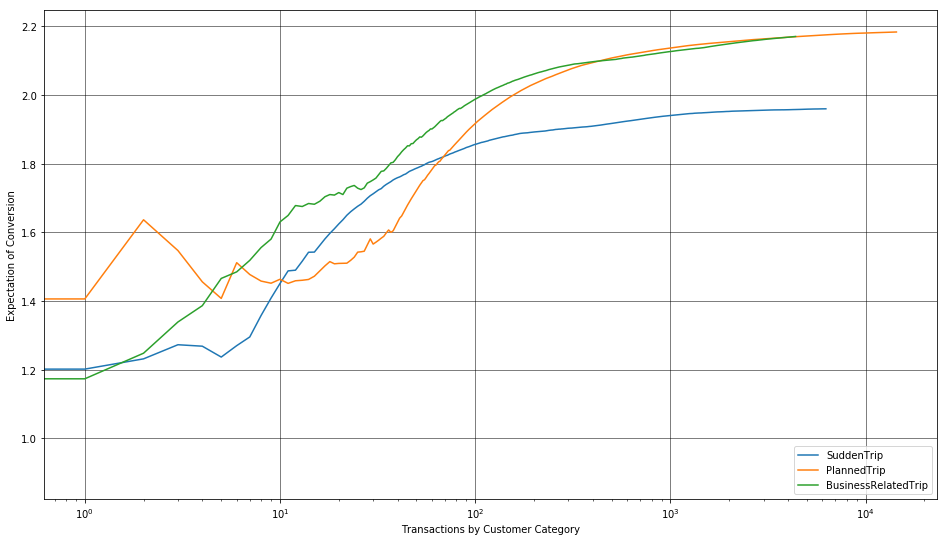

In [33]:
plt.grid(color='k', linestyle='-', linewidth=0.5)
SuddenTrip_Expectation = pd.DataFrame(recordKeeping[recordKeeping['GuestCategory']=='SuddenTrip'][['TransactionNo', 'Expectation']])
PlannedTrip_Expectation = pd.DataFrame(recordKeeping[recordKeeping['GuestCategory']=='PlannedTrip'][['TransactionNo', 'Expectation']])
BusinessRelatedTrip_Expectation = pd.DataFrame(recordKeeping[recordKeeping['GuestCategory']=='BusinessRelatedTrip'][['TransactionNo', 'Expectation']])


cumulative_average_SuddenTrip = np.cumsum(SuddenTrip_Expectation['Expectation'].values)/(np.arange(len(SuddenTrip_Expectation))+1)
cumulative_average_PlannedTrip = np.cumsum(PlannedTrip_Expectation['Expectation'].values)/(np.arange(len(PlannedTrip_Expectation))+1)
cumulative_average_BusinessRelatedTrip = np.cumsum(BusinessRelatedTrip_Expectation['Expectation'].values)/(np.arange(len(BusinessRelatedTrip_Expectation))+1)

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.plot(cumulative_average_SuddenTrip, label='SuddenTrip')
plt.plot(cumulative_average_PlannedTrip,label='PlannedTrip')
plt.plot(cumulative_average_BusinessRelatedTrip, label='BusinessRelatedTrip')

plt.xscale('log')
plt.xlabel('Transactions by Customer Category')
plt.ylabel('Expectation of Conversion')
plt.legend(loc=4)



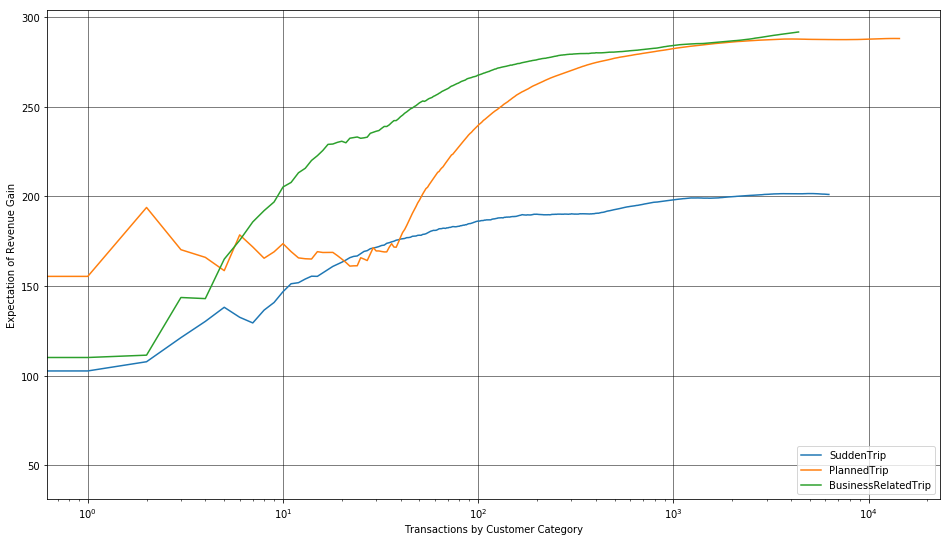

In [34]:
plt.grid(color='k', linestyle='-', linewidth=0.5)

SuddenTrip_Expectation = pd.DataFrame(recordKeeping[recordKeeping['GuestCategory']=='SuddenTrip'][['TransactionNo', 'ExpectationMargin']])
PlannedTrip_Expectation = pd.DataFrame(recordKeeping[recordKeeping['GuestCategory']=='PlannedTrip'][['TransactionNo', 'ExpectationMargin']])
BusinessRelatedTrip_Expectation = pd.DataFrame(recordKeeping[recordKeeping['GuestCategory']=='BusinessRelatedTrip'][['TransactionNo', 'ExpectationMargin']])

cumulative_average_SuddenTrip = np.cumsum(SuddenTrip_Expectation['ExpectationMargin'].values)/(np.arange(len(SuddenTrip_Expectation))+1)
cumulative_average_PlannedTrip = np.cumsum(PlannedTrip_Expectation['ExpectationMargin'].values)/(np.arange(len(PlannedTrip_Expectation))+1)
cumulative_average_BusinessRelatedTrip = np.cumsum(BusinessRelatedTrip_Expectation['ExpectationMargin'].values)/(np.arange(len(BusinessRelatedTrip_Expectation))+1)

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.plot(cumulative_average_SuddenTrip, label='SuddenTrip')
plt.plot(cumulative_average_PlannedTrip,label='PlannedTrip')
plt.plot(cumulative_average_BusinessRelatedTrip, label='BusinessRelatedTrip')


plt.xscale('log')
plt.xlabel('Transactions by Customer Category')
plt.ylabel('Expectation of Revenue Gain')
plt.legend(loc=4)



In [35]:
recordKeeping.to_csv('./MAB-Recommendation-System-Data/recordKeeping.csv')
shown.to_csv('./MAB-Recommendation-System-Data/shown.csv')
bought.to_csv('./MAB-Recommendation-System-Data/bought.csv')

In [36]:
workingData.to_csv('./MAB-Recommendation-System-Data/workingData.csv')

In [37]:
workingData

,StoreID,CustomerCat,ProductId,Alpha,Beta,Hit,Miss
0,78111,SuddenTrip,1005,20.10,482.95,20.0,550.0
1,78111,SuddenTrip,1015,45.90,1056.15,46.0,1208.0
2,78111,SuddenTrip,1016,1759.00,4149.95,2038.0,4213.0
3,78111,SuddenTrip,1017,173.45,3326.95,179.0,3791.0
4,78111,SuddenTrip,1032,231.75,3898.75,241.0,4417.0
5,78111,SuddenTrip,1033,295.00,4660.30,310.0,5242.0
6,78111,SuddenTrip,1034,7.85,298.90,7.0,340.0
7,78111,SuddenTrip,1039,73.85,1461.95,75.0,1679.0
8,78111,SuddenTrip,1042,1577.25,4197.10,1767.0,4487.0
9,78111,SuddenTrip,1047,1717.40,4158.70,1964.0,4285.0


In [39]:
recordKeeping.tail(10)

,TransactionNo,StoreID,Adults,Children,LeadDays,LengthOfStay,ArrivalDate_WeekDay,GuestCategory,Ad_1,Ad_2,...,Ad_4,Ad_5,Ad_6,Ad_7,Ad_8,Ad_9,Ad_10,FinalSelection,Expectation,ExpectationMargin
0,24991,78111,4,1,13,12,Friday,BusinessRelatedTrip,Suite Living Spaces,Hike with Gorillas Tour,...,Champagne,I Love Gorillas Distressed T-Shirt,Ballet: La Dame aux Camélias,Executive Boardroom,"Aerophile ""Parc du Petit Prince"" Single Ticket",Mini Bar,Deluxe Room,[Suite Living Spaces],2.195123,302.966774
0,24992,78111,2,0,83,6,Saturday,PlannedTrip,Standard Room,Suite Living Spaces,...,I Love Gorillas Distressed T-Shirt,Hike with Gorillas Tour,Champagne,Mini Bar,Dimple Stein Beer Mug,Late Check-out,Cordis Kids Spa,"[Standard Room, Ballet: La Dame aux Camélias]",2.195191,285.311174
0,24993,78111,2,0,29,2,Saturday,PlannedTrip,Standard Room,Suite Living Spaces,...,Ballet: La Dame aux Camélias,Hike with Gorillas Tour,Champagne,Cordis Kids Spa,Late Check-out,Concierge Services,Mini Bar,"[I Love Gorillas Distressed T-Shirt, Ballet: L...",2.182941,292.414333
0,24994,78111,2,0,0,5,Friday,SuddenTrip,Deluxe Room,Single Bunk Bed,...,"Aerophile ""Parc du Petit Prince"" Single Ticket",Early Check-in,Mini Bar,Suite Living Spaces,Flight from Hilo to Kona,Concierge Services,Standard Room,"[Single Bunk Bed, Early Check-in]",1.993200,216.532575
0,24995,78111,1,0,0,2,Sunday,SuddenTrip,Single Bunk Bed,Deluxe Room,...,Early Check-in,"Aerophile ""Parc du Petit Prince"" Single Ticket",Mini Bar,Luxury Sheets,ATTCL Men's Sports Fashion Driving Polarized S...,Ballet: La Dame aux Camélias,Concierge Services,[],1.945750,193.521850
0,24996,78111,2,1,17,14,Saturday,BusinessRelatedTrip,Suite Living Spaces,Standard Room,...,I Love Gorillas Distressed T-Shirt,Champagne,Ballet: La Dame aux Camélias,Mini Bar,Executive Boardroom,Single Bunk Bed,Cordis Kids Spa,"[Standard Room, Champagne, Ballet: La Dame aux...",2.209865,294.960068
0,24997,78111,6,0,10,4,Friday,BusinessRelatedTrip,Standard Room,Champagne,...,Hike with Gorillas Tour,I Love Gorillas Distressed T-Shirt,Ballet: La Dame aux Camélias,Executive Boardroom,Mini Bar,Cordis Kids Spa,Single Bunk Bed,[Hike with Gorillas Tour],2.204493,291.566358
0,24998,78111,3,2,83,9,Friday,PlannedTrip,Standard Room,Suite Living Spaces,...,Ballet: La Dame aux Camélias,Hike with Gorillas Tour,Champagne,Cordis Kids Spa,Late Check-out,Mini Bar,Dimple Stein Beer Mug,"[Suite Living Spaces, Ballet: La Dame aux Camé...",2.195691,285.372406
0,24999,78111,6,0,16,4,Friday,BusinessRelatedTrip,Suite Living Spaces,Hike with Gorillas Tour,...,I Love Gorillas Distressed T-Shirt,Champagne,Ballet: La Dame aux Camélias,Executive Boardroom,Mini Bar,Single Bunk Bed,"Aerophile ""Parc du Petit Prince"" Single Ticket","[Suite Living Spaces, I Love Gorillas Distress...",2.200232,293.404181
0,25000,78111,4,0,15,3,Friday,BusinessRelatedTrip,Suite Living Spaces,Hike with Gorillas Tour,...,Champagne,Standard Room,Ballet: La Dame aux Camélias,Executive Boardroom,Mini Bar,Deluxe Room,Cordis Kids Spa,"[Suite Living Spaces, Ballet: La Dame aux Camé...",2.194939,303.430051
